# CS 221 Project - Finding Classification Values
This notebook determines the classification ranges for different levels of virality.

## Libraries
Using `pandas` for data analysis.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading in Data
Looking at the data from the Kaggle dataset.

In [26]:
# Loading in the data
main_df = pd.read_csv('data/ted_main.csv')
transcript_df = pd.read_csv('data/transcripts.csv')

# Look at views and corresponding transcripts
views = main_df['views']
transcripts = transcript_df['transcript']

## Visualizing Distribution of Views
Looking at all possible TED Talks, and then going from there.

(array([ 3., 10., 16., 17., 19., 40., 35., 59., 47., 54., 59., 59., 65.,
        76., 82., 76., 77., 74., 80., 93., 83., 90., 82., 62., 84., 55.,
        45., 54., 51., 58., 54., 42., 43., 42., 26., 24., 26., 28., 18.,
        19., 19., 22., 17., 15., 18., 16., 12., 19.,  5., 11., 13., 16.,
         9., 11., 13.,  8.,  7.,  7.,  4.,  7.,  6.,  7.,  3.,  6.,  6.,
         7.,  7.,  6.,  4.,  5.,  4.,  4.,  4.,  3.,  2.,  3.,  6.,  5.,
         3.,  4.,  4.,  3.,  3.,  2.,  7.,  3.,  3.,  4.,  5.,  2.,  2.,
         6.,  1.,  1.,  2.,  5.,  5.,  4.,  1.,  2.,  5.,  1.,  4.,  3.,
         2.,  1.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,
         1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,
         1.,  2.,  1.,  0.,  1.,  0.,  4.,  0.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,
         1.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
         1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  1.

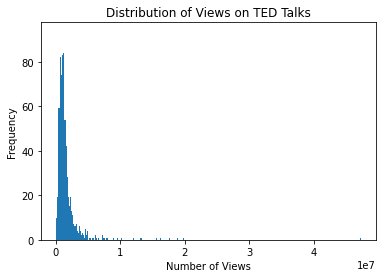

In [31]:
plt.title("Distribution of Views on TED Talks")
plt.xlabel("Number of Views")
plt.ylabel("Frequency")
plt.hist(views, bins=1000)